## SCALING AND NORMALIZATION

Transforming numeric variables for accurate modeling

------

In [5]:
!pip install mlxtend


In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# We will use Box-cox transformation method for Normalization
from scipy import stats

# We will use min_max scaling
from mlxtend.preprocessing import minmax_scaling

# setting a random seed, we can ensure that our results are consistent and can be easily reproduced.
np.random.seed(0)

In [17]:
weather = pd.read_csv('PRSA_data_.csv', index_col=False)

In [18]:
weather.head(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [19]:
weather_dropped = weather.dropna(axis=1)

In [20]:
weather_dropped.head(5)

,No,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,-20,-12.0,1018.0,NW,12.97,0,0


In [25]:
weather_drop = weather.dropna(subset=['pm2.5'], inplace=True)

In [27]:
weather

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


-----
Removing several columns from the 'weather' DataFrame, because those columns are not needed for the tasks being performed on the data.

In [29]:
weather.drop(columns=['No','year','month','day','hour','cbwd'], inplace=True)


In [30]:
weather.head(10)

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,129.0,-16,-4.0,1020.0,1.79,0,0
25,148.0,-15,-4.0,1020.0,2.68,0,0
26,159.0,-11,-5.0,1021.0,3.57,0,0
27,181.0,-7,-5.0,1022.0,5.36,1,0
28,138.0,-7,-5.0,1022.0,6.25,2,0
29,109.0,-7,-6.0,1022.0,7.14,3,0
30,105.0,-7,-6.0,1023.0,8.93,4,0
31,124.0,-7,-5.0,1024.0,10.72,0,0
32,120.0,-8,-6.0,1024.0,12.51,0,0
33,132.0,-7,-5.0,1025.0,14.30,0,0


In [33]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm2.5   41757 non-null  float64
 1   DEWP    41757 non-null  int64  
 2   TEMP    41757 non-null  float64
 3   PRES    41757 non-null  float64
 4   Iws     41757 non-null  float64
 5   Is      41757 non-null  int64  
 6   Ir      41757 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 2.5 MB


The Original data would be scaled using the minmax_scaling.

The viz below compares the original and scaled data.


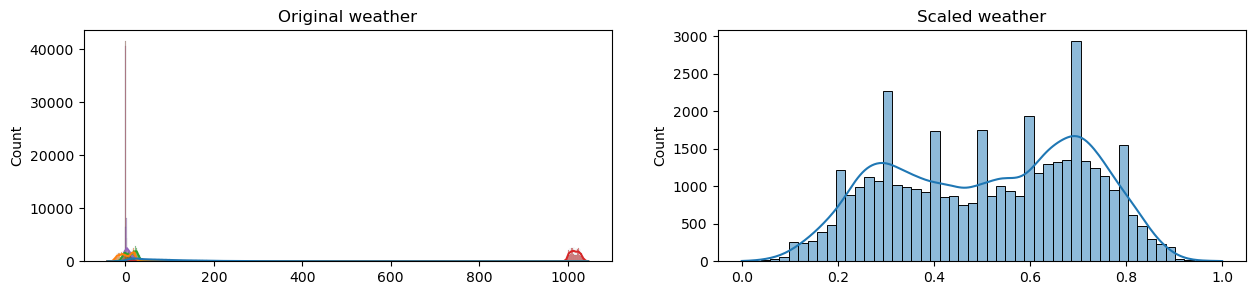

In [44]:
weather_scaled = minmax_scaling(weather, columns=['TEMP'])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))

sns.histplot(weather, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original weather")

sns.histplot(weather_scaled, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled weather")

plt.show()

From the comparison the Original data ranges from 0 - 100 while the Scaled data ranges from 0 - 1. 
It can also be observed that the distribution also changed this is because the original distribution was not uniform, then applying Min-Max scaling can change the shape of the distribution. 
For example, if the original distribution was skewed, then applying Min-Max scaling can make it more symmetric. On the other hand, if the original distribution was already uniform, then Min-Max scaling may not change the distribution significantly.

---
### NORMALIZATION


Normalization changes the distribution of our data. The aim of normalization is to change the observation so they can be a normal distribution or Gaussian distribution. A Gaussian distribution is a distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean.  



We will use the Box-cox method for normalization. 
The stats.boxcox() function applies the Box-Cox power transformation to the input data in order to make it more normally distributed

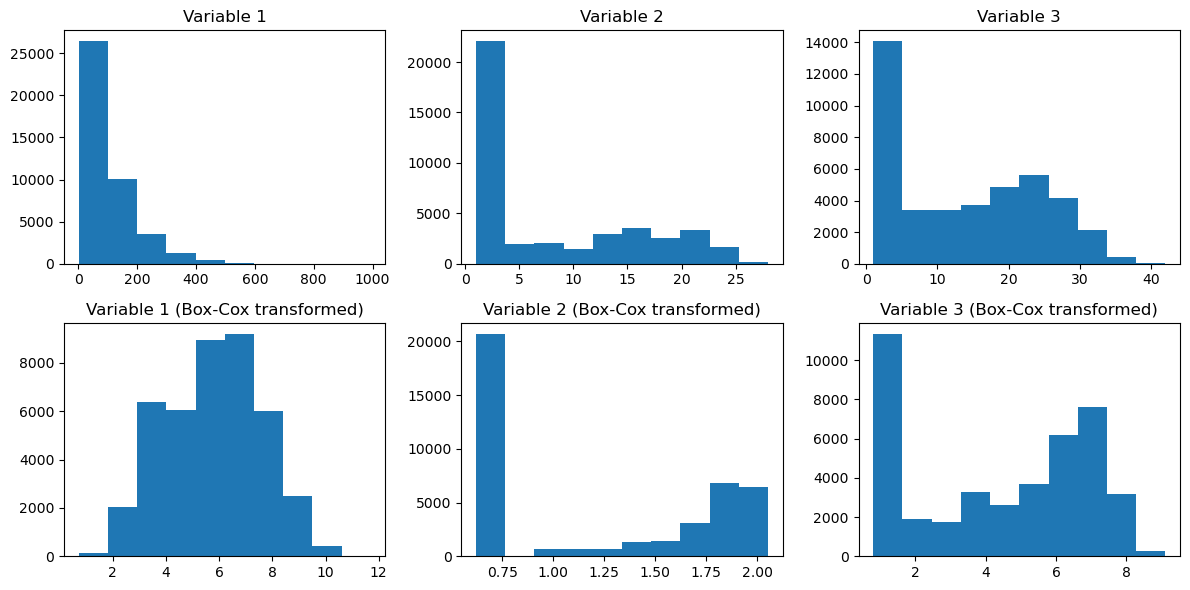

In [59]:
 # replace negative values with minimum positive value
min_pos_value = np.abs(weather[weather > 0]).min()
weather = np.where(weather <= 0, min_pos_value, weather)

# This code applies the Box-Cox transformation to each column of a 2D numpy array
weather_norm = np.apply_along_axis(lambda x: stats.boxcox(x + 1)[0], axis=0, arr=weather)

# plot both together to compare
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

for i in range(3):
    axes[0, i].hist(weather[:, i])
    axes[0, i].set_title(f'Variable {i+1}')
    axes[1, i].hist(weather_norm[:, i])
    axes[1, i].set_title(f'Variable {i+1} (Box-Cox transformed)')
    
plt.tight_layout()
plt.show()

From the comparsion between the Original features and the Normalized features (Box-Cox transformation).
It is important to note that the Box-Cox transformation is not intended to normalize the distribution of the data to a Gaussian (normal) distribution, but rather to transform the data to a distribution that is closer to normality.